In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
admissions = pd.read_csv('admissions.csv')
admissions.head()

,Year,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value
0,2014/15,All codes,All admissions,All admissions,Number of admissions,NaN,11011882
1,2014/15,C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...,All diseases which can be caused by smoking,All diseases which can be caused by smoking,Number of admissions,NaN,1713330
2,2014/15,C00-D48,All cancers,All cancers,Number of admissions,NaN,1691035
3,2014/15,J00-J99,All respiratory diseases,All respiratory diseases,Number of admissions,NaN,611002
4,2014/15,I00-I99,All circulatory diseases,All circulatory diseases,Number of admissions,NaN,907157


In [79]:
admissions.shape

(2079, 7)

In [80]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             2079 non-null   object
 1   ICD10 Code       2079 non-null   object
 2   ICD10 Diagnosis  2079 non-null   object
 3   Diagnosis Type   2079 non-null   object
 4   Metric           2079 non-null   object
 5   Sex              1386 non-null   object
 6   Value            2078 non-null   object
dtypes: object(7)
memory usage: 113.8+ KB


In [81]:
admissions['Year'].unique()

array(['2014/15', '2013/14', '2012/13', '2011/12', '2010/11', '2009/10',
       '2008/09', '2007/08', '2006/07', '2005/06', '2004/05'],
      dtype=object)

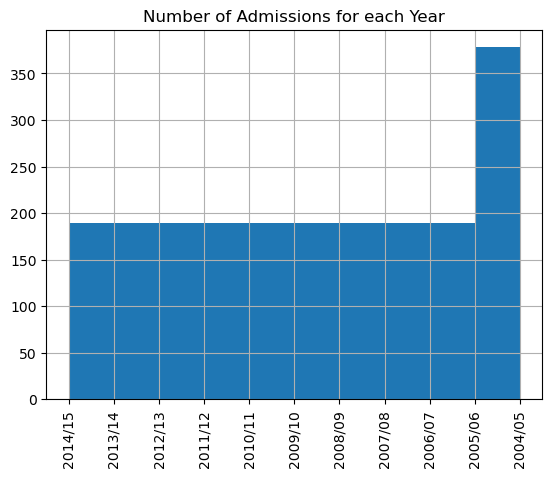

In [82]:
admissions['Year'].hist()
plt.xticks(rotation=90)
plt.title('Number of Admissions for each Year')
plt.show()

In [83]:
admissions['ICD10 Diagnosis'].unique()

array(['All admissions', 'All diseases which can be caused by smoking',
       'All cancers', 'All respiratory diseases',
       'All circulatory diseases', 'All diseases of the digestive system',
       'Trachea, Lung, Bronchus', 'Upper Respiratory Sites', 'Oesophagus',
       'Larynx', 'Cervical', 'Bladder', 'Kidney and Renal Pelvis',
       'Stomach', 'Pancreas', 'Unspecified Site', 'Myeloid Leukaemia',
       'Chronic Obstructive Lung Disease', 'Chronic Airway Obstruction',
       'Pneumonia, Influenza', 'Other Heart Disease',
       'Ischaemic Heart Disease', 'Other arterial disease',
       'Cerebrovascular Disease', 'Aortic Aneurysm', 'Atherosclerosis',
       'Stomach / Duodenal Ulcer', 'Crohns Disease',
       'Periodontal Disease / Periodonitis', 'Age Related Cataract 45+',
       'Hip Fracture 55+', 'Spontaneous Abortion'], dtype=object)

In [84]:
admissions['Diagnosis Type'].unique()

array(['All admissions', 'All diseases which can be caused by smoking',
       'All cancers', 'All respiratory diseases',
       'All circulatory diseases', 'All diseases of the digestive system',
       'Cancers which can be caused by smoking',
       'Respiratory diseases which can be caused by smoking',
       'Circulatory diseases which can be caused by smoking',
       'Digestive diseases which can be caused caused by smoking',
       'Other diseases which can be caused by smoking'], dtype=object)

In [85]:
admissions['Value'].replace('.', '0', inplace=True)

In [86]:
admissions['Value'] = pd.to_numeric(admissions['Value'])

In [87]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             2079 non-null   object 
 1   ICD10 Code       2079 non-null   object 
 2   ICD10 Diagnosis  2079 non-null   object 
 3   Diagnosis Type   2079 non-null   object 
 4   Metric           2079 non-null   object 
 5   Sex              1386 non-null   object 
 6   Value            2078 non-null   float64
dtypes: float64(1), object(6)
memory usage: 113.8+ KB


In [88]:
admissions.groupby('Diagnosis Type')['Value'].sum()

Diagnosis Type
All admissions                                              209514359.0
All cancers                                                  37760354.0
All circulatory diseases                                     23952538.0
All diseases of the digestive system                         29176910.0
All diseases which can be caused by smoking                  33456038.0
All respiratory diseases                                     14047154.0
Cancers which can be caused by smoking                       10687286.0
Circulatory diseases which can be caused by smoking          18435272.0
Digestive diseases which can be caused caused by smoking      1557198.0
Other diseases which can be caused by smoking                 4801432.0
Respiratory diseases which can be caused by smoking           8034144.0
Name: Value, dtype: float64

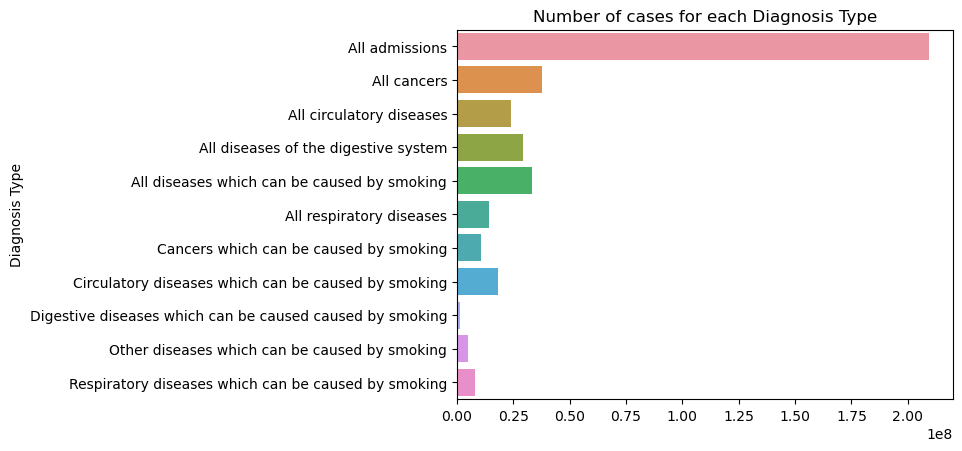

In [89]:
sns.barplot(x=admissions.groupby('Diagnosis Type')['Value'].sum().values, y=admissions.groupby('Diagnosis Type')['Value'].sum().index)
plt.title('Number of cases for each Diagnosis Type')
plt.show()

In [90]:
admissions.groupby('Sex')['Value'].sum()

Sex
Female     99737870.0
Male      100979701.0
Name: Value, dtype: float64

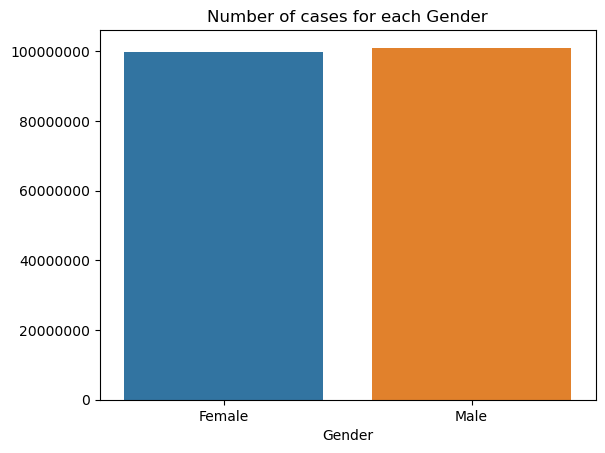

In [91]:
sns.barplot(x=admissions.groupby('Sex')['Value'].sum().index, y= admissions.groupby('Sex')['Value'].sum().values)
plt.title('Number of cases for each Gender')
plt.xlabel('Gender')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

In [92]:
fatalities = pd.read_csv('fatalities.csv')
fatalities.head()

,Year,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value
0,2014,All codes,All deaths,All deaths,Number of observed deaths,NaN,459087
1,2014,C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...,All deaths which can be caused by smoking,All deaths which can be caused by smoking,Number of observed deaths,NaN,235820
2,2014,C00-D48,All cancers,All cancers,Number of observed deaths,NaN,136312
3,2014,J00-J99,All respiratory diseases,All respiratory diseases,Number of observed deaths,NaN,61744
4,2014,I00-I99,All circulatory diseases,All circulatory diseases,Number of observed deaths,NaN,126101


In [93]:
fatalities.shape

(1749, 7)

In [94]:
fatalities['Value'].replace('.', '0', inplace = True)

In [95]:
fatalities.iloc[248]

Year                                                 2013
ICD10 Code                                            C53
ICD10 Diagnosis                                  Cervical
Diagnosis Type     Cancers which can be caused by smoking
Metric                                Attributable number
Sex                                                  Male
Value                                                   0
Name: 248, dtype: object

In [96]:
fatalities['Value'] = pd.to_numeric(fatalities['Value'])

In [97]:
fatalities['Diagnosis Type'].unique()

array(['All deaths', 'All deaths which can be caused by smoking',
       'All cancers', 'All respiratory diseases',
       'All circulatory diseases', 'All diseases of the digestive system',
       'Cancers which can be caused by smoking',
       'Respiratory diseases which can be caused by smoking',
       'Circulatory diseases which can be caused by smoking',
       'Digestive diseases which can be caused caused by smoking'],
      dtype=object)

In [98]:
admissions['Diagnosis Type'].unique()

array(['All admissions', 'All diseases which can be caused by smoking',
       'All cancers', 'All respiratory diseases',
       'All circulatory diseases', 'All diseases of the digestive system',
       'Cancers which can be caused by smoking',
       'Respiratory diseases which can be caused by smoking',
       'Circulatory diseases which can be caused by smoking',
       'Digestive diseases which can be caused caused by smoking',
       'Other diseases which can be caused by smoking'], dtype=object)

In [99]:
fatalities_aggregated = fatalities.groupby('Diagnosis Type')['Value'].sum()
fatalities_aggregated.sort_index

<bound method Series.sort_index of Diagnosis Type
All cancers                                                  3711340
All circulatory diseases                                     3727508
All deaths                                                  11890650
All deaths which can be caused by smoking                    5689918
All diseases of the digestive system                          537040
All respiratory diseases                                     1926950
Cancers which can be caused by smoking                       2281084
Circulatory diseases which can be caused by smoking          3558846
Digestive diseases which can be caused caused by smoking       82276
Respiratory diseases which can be caused by smoking          1574912
Name: Value, dtype: int64>

In [100]:
fatalities_aggregated = fatalities_aggregated.reindex(['All deaths', 'All cancers', 'All circulatory diseases', 'All deaths which can be caused by smoking', 'All diseases of the digestive system', 'All respiratory diseases', 
'Cancers which can be caused by smoking', 'Circulatory diseases which can be caused by smoking', 'Digestive diseases which can be caused caused by smoking', 'Respiratory diseases which can be caused by smoking'])

In [101]:
admissions_aggregated = admissions.groupby('Diagnosis Type')['Value'].sum()

In [102]:
admissions_aggregated = admissions_aggregated.reindex(['All admissions', 'All cancers', 'All circulatory diseases', 'All diseases which can be caused by smoking', 'All diseases of the digestive system', 'All respiratory diseases', 
'Cancers which can be caused by smoking', 'Circulatory diseases which can be caused by smoking', 'Digestive diseases which can be caused caused by smoking', 'Respiratory diseases which can be caused by smoking', 'Other diseases which can be caused by smoking'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


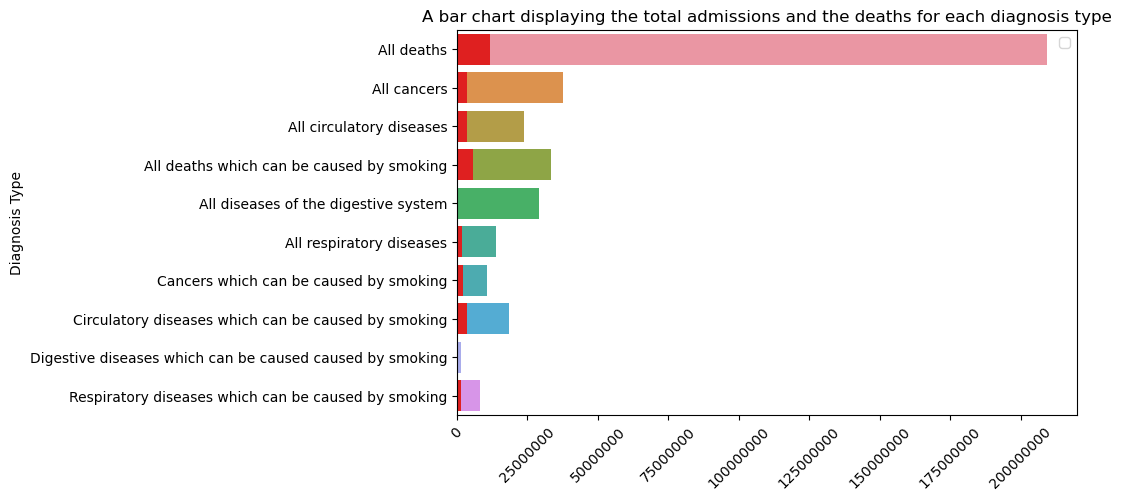

In [103]:
# Figure size
plt.figure(figsize=(8,5))

# Plotting
sns.barplot(x=admissions_aggregated.values, y=admissions_aggregated.index)
sns.barplot(x=fatalities_aggregated.values, y=fatalities_aggregated.index, color='red')
plt.ylabel('Diagnosis Type')
plt.title('A bar chart displaying the total admissions and the deaths for each diagnosis type')
plt.xticks(rotation =45)
plt.legend()
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.show()

In [104]:
metrics = pd.read_csv('metrics.csv')
metrics.head()

,Year,Tobacco Price\nIndex,Retail Prices\nIndex,Tobacco Price Index Relative to Retail Price Index,Real Households' Disposable Income,Affordability of Tobacco Index,Household Expenditure on Tobacco,Household Expenditure Total,Expenditure on Tobacco as a Percentage of Expenditure
0,2015,1294.3,386.7,334.7,196.4,58.7,19252.0,1152387.0,1.7
1,2014,1226.0,383.0,320.1,190.0,59.4,19411.0,1118992.0,1.7
2,2013,1139.3,374.2,304.5,190.3,62.5,18683.0,1073106.0,1.7
3,2012,1057.8,363.1,291.3,192.9,66.2,18702.0,1029378.0,1.8
4,2011,974.9,351.9,277.1,189.3,68.3,18217.0,990828.0,1.8


In [105]:
metrics.shape

(36, 9)

In [106]:
prescriptions = pd.read_csv('prescriptions.csv')
prescriptions.head()

,Year,All Pharmacotherapy Prescriptions,Nicotine Replacement Therapy (NRT) Prescriptions,Bupropion (Zyban) Prescriptions,Varenicline (Champix) Prescriptions,Net Ingredient Cost of All Pharmacotherapies,Net Ingredient Cost of Nicotine Replacement Therapies (NRT),Net Ingredient Cost of Bupropion (Zyban),Net Ingredient Cost of Varenicline (Champix)
0,2014/15,1348,766,21,561.0,38145,18208,807,19129.0
1,2013/14,1778,1059,22,697.0,48767,24257,865,23646.0
2,2012/13,2203,1318,26,859.0,58121,28069,994,29058.0
3,2011/12,2532,1545,30,957.0,64552,30951,1216,32385.0
4,2010/11,2564,1541,36,987.0,65883,30808,1581,33494.0


In [107]:
prescriptions.shape

(11, 9)

In [108]:
import re

In [109]:
re.search(r"(\d{4})", prescriptions['Year'].iloc[0]).group(1)

'2014'

In [110]:
for i in prescriptions['Year']:
    prescriptions['Year'].replace(i, re.search(r"(\d{4})", i).group(1), inplace=True)


In [111]:
prescriptions.head()

,Year,All Pharmacotherapy Prescriptions,Nicotine Replacement Therapy (NRT) Prescriptions,Bupropion (Zyban) Prescriptions,Varenicline (Champix) Prescriptions,Net Ingredient Cost of All Pharmacotherapies,Net Ingredient Cost of Nicotine Replacement Therapies (NRT),Net Ingredient Cost of Bupropion (Zyban),Net Ingredient Cost of Varenicline (Champix)
0,2014,1348,766,21,561.0,38145,18208,807,19129.0
1,2013,1778,1059,22,697.0,48767,24257,865,23646.0
2,2012,2203,1318,26,859.0,58121,28069,994,29058.0
3,2011,2532,1545,30,957.0,64552,30951,1216,32385.0
4,2010,2564,1541,36,987.0,65883,30808,1581,33494.0


In [112]:
# Now Join prescriptions and metrics
prescriptions = prescriptions.set_index('Year')

In [113]:
metrics = metrics.set_index('Year')

In [114]:
fatalities = fatalities.set_index('Year')

In [115]:
for i in admissions['Year']:
    admissions['Year'].replace(i, re.search(r"(\d{4})", i).group(1), inplace=True)


In [116]:
admissions = admissions.set_index('Year')

In [117]:
prescriptions.index = pd.to_numeric(prescriptions.index)
metrics.index = pd.to_numeric(metrics.index)
fatalities.index = pd.to_numeric(fatalities.index)
admissions.index = pd.to_numeric(admissions.index)

In [118]:
df = prescriptions.join(metrics, on='Year', how='inner')

In [119]:
df = df.join(fatalities, on='Year', how='inner')

In [120]:
df.drop(columns = ['ICD10 Code', 'ICD10 Diagnosis', 'Diagnosis Type', 'Metric', 'Sex'], inplace=True)

In [121]:
df.head()

,All Pharmacotherapy Prescriptions,Nicotine Replacement Therapy (NRT) Prescriptions,Bupropion (Zyban) Prescriptions,Varenicline (Champix) Prescriptions,Net Ingredient Cost of All Pharmacotherapies,Net Ingredient Cost of Nicotine Replacement Therapies (NRT),Net Ingredient Cost of Bupropion (Zyban),Net Ingredient Cost of Varenicline (Champix),Tobacco Price\nIndex,Retail Prices\nIndex,Tobacco Price Index Relative to Retail Price Index,Real Households' Disposable Income,Affordability of Tobacco Index,Household Expenditure on Tobacco,Household Expenditure Total,Expenditure on Tobacco as a Percentage of Expenditure,Value
Year,,,,,,,,,,,,,,,,,
2014,1348,766,21,561.0,38145,18208,807,19129.0,1226.0,383.0,320.1,190.0,59.4,19411.0,1118992.0,1.7,459087
2014,1348,766,21,561.0,38145,18208,807,19129.0,1226.0,383.0,320.1,190.0,59.4,19411.0,1118992.0,1.7,235820
2014,1348,766,21,561.0,38145,18208,807,19129.0,1226.0,383.0,320.1,190.0,59.4,19411.0,1118992.0,1.7,136312
2014,1348,766,21,561.0,38145,18208,807,19129.0,1226.0,383.0,320.1,190.0,59.4,19411.0,1118992.0,1.7,61744
2014,1348,766,21,561.0,38145,18208,807,19129.0,1226.0,383.0,320.1,190.0,59.4,19411.0,1118992.0,1.7,126101


In [122]:
df['Deaths'] = df['Value']
df.drop(columns = ['Value'], inplace=True)

In [123]:
df = df.join(admissions, on='Year', how='inner')

In [124]:
df['Admissions'] = df['Value']
df.drop(columns = ['Value'], inplace=True)
df.drop(columns = ['ICD10 Code', 'ICD10 Diagnosis', 'Diagnosis Type', 'Metric', 'Sex'], inplace=True)

In [125]:
df.head()

,All Pharmacotherapy Prescriptions,Nicotine Replacement Therapy (NRT) Prescriptions,Bupropion (Zyban) Prescriptions,Varenicline (Champix) Prescriptions,Net Ingredient Cost of All Pharmacotherapies,Net Ingredient Cost of Nicotine Replacement Therapies (NRT),Net Ingredient Cost of Bupropion (Zyban),Net Ingredient Cost of Varenicline (Champix),Tobacco Price\nIndex,Retail Prices\nIndex,Tobacco Price Index Relative to Retail Price Index,Real Households' Disposable Income,Affordability of Tobacco Index,Household Expenditure on Tobacco,Household Expenditure Total,Expenditure on Tobacco as a Percentage of Expenditure,Deaths,Admissions
Year,,,,,,,,,,,,,,,,,,
2014,1348,766,21,561.0,38145,18208,807,19129.0,1226.0,383.0,320.1,190.0,59.4,19411.0,1118992.0,1.7,459087,11011882.0
2014,1348,766,21,561.0,38145,18208,807,19129.0,1226.0,383.0,320.1,190.0,59.4,19411.0,1118992.0,1.7,459087,1713330.0
2014,1348,766,21,561.0,38145,18208,807,19129.0,1226.0,383.0,320.1,190.0,59.4,19411.0,1118992.0,1.7,459087,1691035.0
2014,1348,766,21,561.0,38145,18208,807,19129.0,1226.0,383.0,320.1,190.0,59.4,19411.0,1118992.0,1.7,459087,611002.0
2014,1348,766,21,561.0,38145,18208,807,19129.0,1226.0,383.0,320.1,190.0,59.4,19411.0,1118992.0,1.7,459087,907157.0


In [126]:
df.shape

(330561, 18)

In [127]:
df.columns

Index(['All Pharmacotherapy Prescriptions',
       'Nicotine Replacement Therapy (NRT) Prescriptions',
       'Bupropion (Zyban) Prescriptions',
       'Varenicline (Champix) Prescriptions',
       'Net Ingredient Cost of All Pharmacotherapies',
       'Net Ingredient Cost of Nicotine Replacement Therapies (NRT)',
       'Net Ingredient Cost of Bupropion (Zyban)',
       'Net Ingredient Cost of Varenicline (Champix)', 'Tobacco Price\nIndex',
       'Retail Prices\nIndex',
       'Tobacco Price Index Relative to Retail Price Index',
       'Real Households' Disposable Income', 'Affordability of Tobacco Index',
       'Household Expenditure on Tobacco', 'Household Expenditure Total',
       'Expenditure on Tobacco as a Percentage of Expenditure', 'Deaths',
       'Admissions'],
      dtype='object')

In [128]:
df['Year'] = df.index

In [129]:
df.reset_index(drop=True, inplace=True)
df.fillna(0, inplace=True)

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


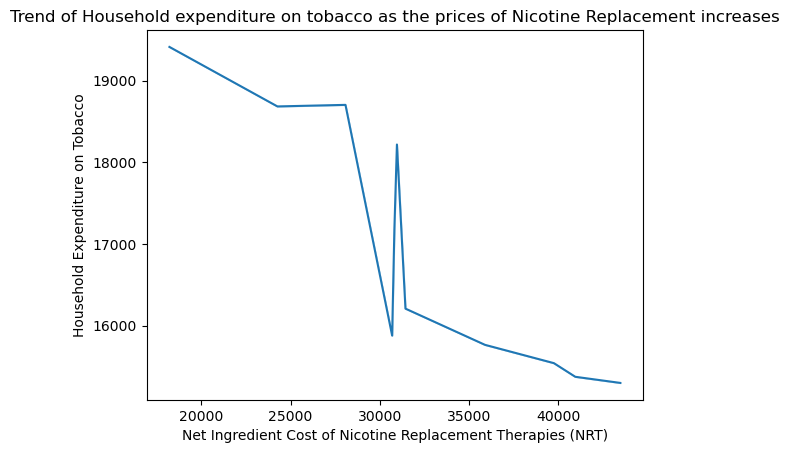

In [130]:
sns.lineplot(x=df['Net Ingredient Cost of Nicotine Replacement Therapies (NRT)'], y=df['Household Expenditure on Tobacco'])
plt.title('Trend of Household expenditure on tobacco as the prices of Nicotine Replacement increases')
plt.show()

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Tobacco Price\nIndex', ylabel='Deaths'>

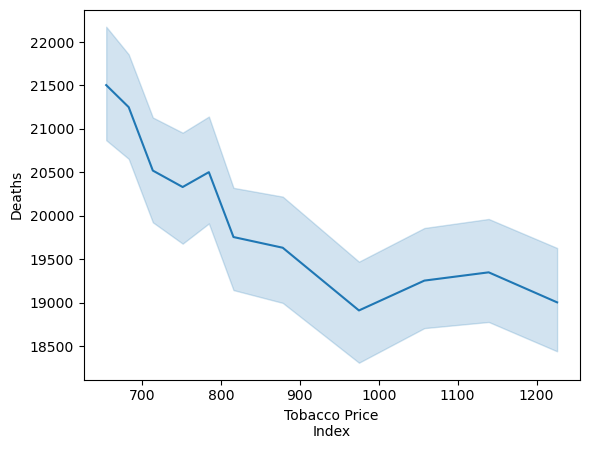

In [131]:
sns.lineplot(x=df['Tobacco Price\nIndex'], y=df['Deaths'])

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Expenditure on Tobacco as a Percentage of Expenditure', ylabel='Deaths'>

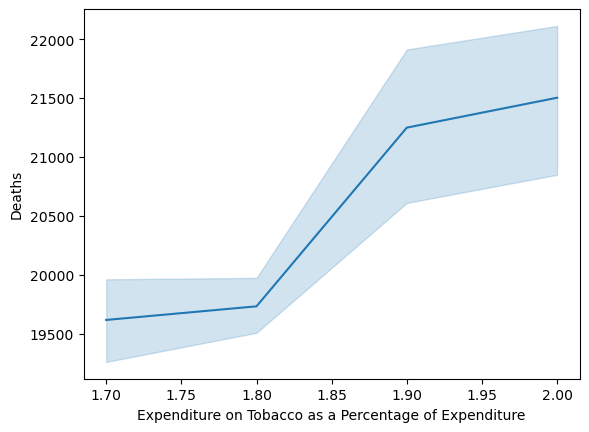

In [132]:
sns.lineplot(x=df['Expenditure on Tobacco as a Percentage of Expenditure'], y=df['Deaths'])

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='All Pharmacotherapy Prescriptions', ylabel='Deaths'>

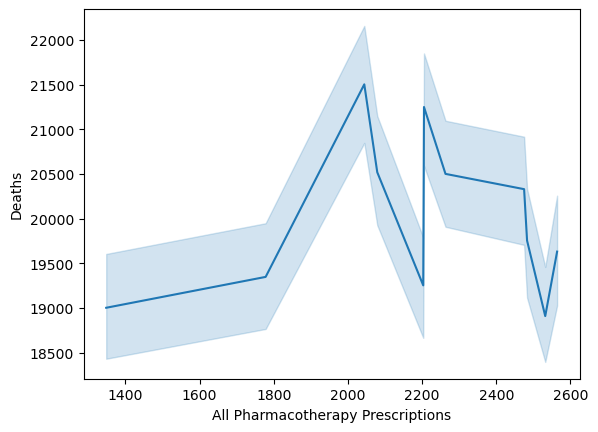

In [133]:
sns.lineplot(x=df['All Pharmacotherapy Prescriptions'], y=df['Deaths'])

In [134]:
#Let's remove few more columns
cols_to_remove = ['All Pharmacotherapy Prescriptions', 'Nicotine Replacement Therapy (NRT) Prescriptions', 'Bupropion (Zyban) Prescriptions', 'Varenicline (Champix) Prescriptions',
'Net Ingredient Cost of Nicotine Replacement Therapies (NRT)', 'Net Ingredient Cost of Bupropion (Zyban)', 'Net Ingredient Cost of Varenicline (Champix)',
'Tobacco Price\nIndex', 'Retail Prices\nIndex', 'Tobacco Price Index Relative to Retail Price Index', 'Real Households\' Disposable Income', 
'Affordability of Tobacco Index', 'Expenditure on Tobacco as a Percentage of Expenditure']

In [135]:
df_new = df.drop(columns = cols_to_remove)

In [136]:
df_new.head()

,Net Ingredient Cost of All Pharmacotherapies,Household Expenditure on Tobacco,Household Expenditure Total,Deaths,Admissions,Year
0,38145,19411.0,1118992.0,459087,11011882.0,2014
1,38145,19411.0,1118992.0,459087,1713330.0,2014
2,38145,19411.0,1118992.0,459087,1691035.0,2014
3,38145,19411.0,1118992.0,459087,611002.0,2014
4,38145,19411.0,1118992.0,459087,907157.0,2014


In [137]:
df_new['Treatment Cost'] = df_new['Net Ingredient Cost of All Pharmacotherapies']
df_new['Amount spent on tobacco'] = df_new['Household Expenditure on Tobacco']
df_new['Total expense of household'] = df_new['Household Expenditure Total']

In [138]:
df_new.head()

,Net Ingredient Cost of All Pharmacotherapies,Household Expenditure on Tobacco,Household Expenditure Total,Deaths,Admissions,Year,Treatment Cost,Amount spent on tobacco,Total expense of household
0,38145,19411.0,1118992.0,459087,11011882.0,2014,38145,19411.0,1118992.0
1,38145,19411.0,1118992.0,459087,1713330.0,2014,38145,19411.0,1118992.0
2,38145,19411.0,1118992.0,459087,1691035.0,2014,38145,19411.0,1118992.0
3,38145,19411.0,1118992.0,459087,611002.0,2014,38145,19411.0,1118992.0
4,38145,19411.0,1118992.0,459087,907157.0,2014,38145,19411.0,1118992.0


In [139]:
df_new.drop(columns = ['Net Ingredient Cost of All Pharmacotherapies', 'Household Expenditure on Tobacco', 'Household Expenditure Total'], inplace=True)

In [140]:
df_new.head()

,Deaths,Admissions,Year,Treatment Cost,Amount spent on tobacco,Total expense of household
0,459087,11011882.0,2014,38145,19411.0,1118992.0
1,459087,1713330.0,2014,38145,19411.0,1118992.0
2,459087,1691035.0,2014,38145,19411.0,1118992.0
3,459087,611002.0,2014,38145,19411.0,1118992.0
4,459087,907157.0,2014,38145,19411.0,1118992.0


In [141]:
df_new.shape

(330561, 6)

In [142]:
df_new.index.unique()

RangeIndex(start=0, stop=330561, step=1)

In [143]:
df_new.corr()

,Deaths,Admissions,Year,Treatment Cost,Amount spent on tobacco,Total expense of household
Deaths,1.000000,-0.000216,-0.014946,-0.004168,-0.014189,-0.014412
Admissions,-0.000216,1.000000,0.016620,-0.004140,0.014611,0.018218
Year,-0.014946,0.016620,1.000000,0.055661,0.959953,0.988044
Treatment Cost,-0.004168,-0.004140,0.055661,1.000000,-0.063266,-0.018476
Amount spent on tobacco,-0.014189,0.014611,0.959953,-0.063266,1.000000,0.946442
Total expense of household,-0.014412,0.018218,0.988044,-0.018476,0.946442,1.000000


<Axes: >

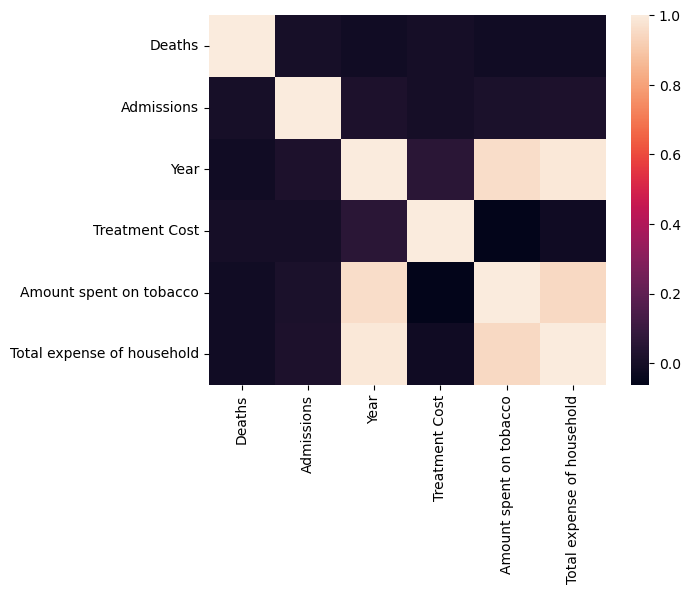

In [144]:
sns.heatmap(df_new.corr())

In [157]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics

In [152]:
X = df_new.drop(columns = ['Deaths'])
Y = df_new['Deaths']

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [154]:
olsModel = sm.OLS(y_train, X_train)

In [155]:
result = olsModel.fit()

In [156]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Deaths   R-squared (uncentered):                   0.124
Model:                            OLS   Adj. R-squared (uncentered):              0.124
Method:                 Least Squares   F-statistic:                              7042.
Date:                Tue, 15 Oct 2024   Prob (F-statistic):                        0.00
Time:                        08:20:09   Log-Likelihood:                     -3.0497e+06
No. Observations:              247920   AIC:                                  6.099e+06
Df Residuals:                  247915   BIC:                                  6.099e+06
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Admissions                 -3.811e-05      0.000     -0.300      0.764      -0.000       0.000
Year                          14.7724      0.792     18.661      0.000      13.221      16.324
Treatment Cost                -0.0280      0.012     -2.323      0.020      -0.052      -0.004
Amount spent on tobacco       -0.2362      0.226     -1.043      0.297      -0.680       0.208
Total expense of household    -0.0044      0.003     -1.343      0.179      -0.011       0.002
==============================================================================
Omnibus:                   250166.158   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11992607.305
Skew:                           5.163   Prob(JB):                         0.00
Kurtosis:                      35.471   Cond. No.                     7.59e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

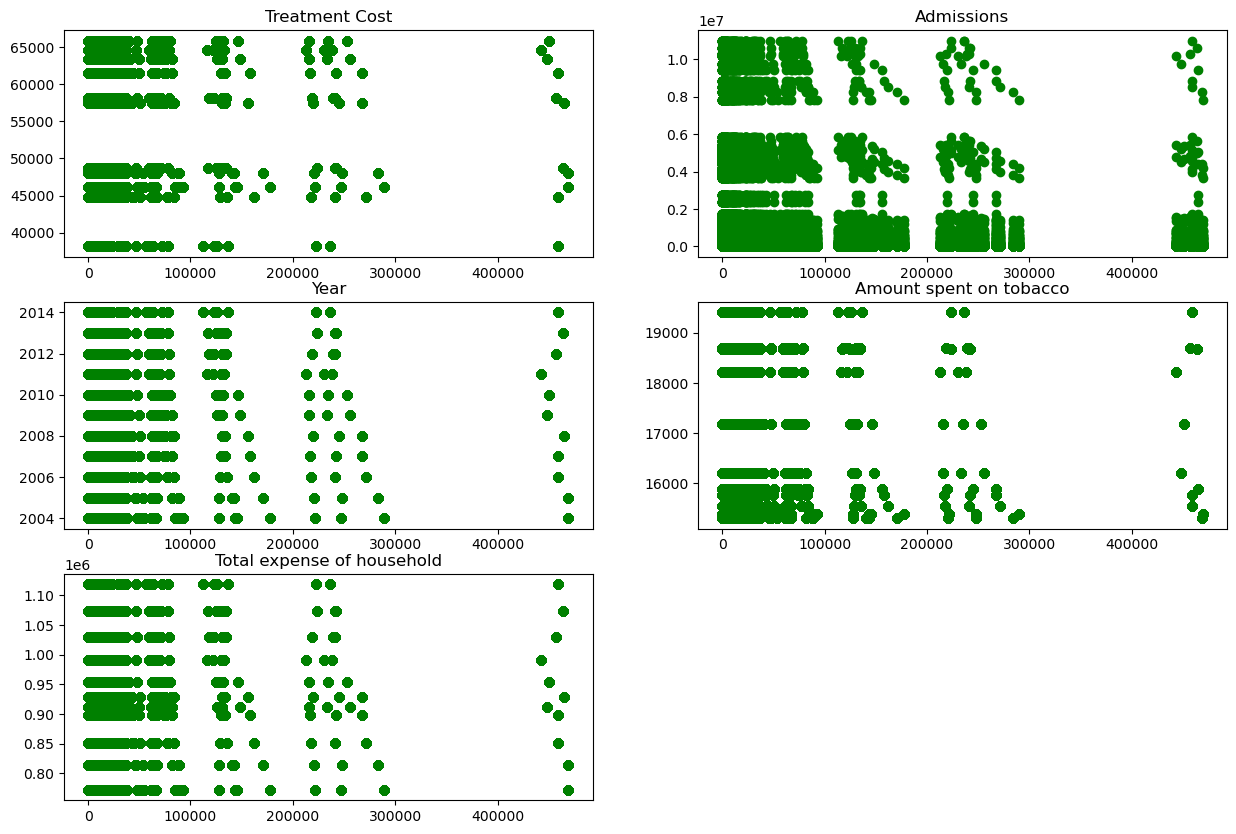

In [176]:
#Deaths against attributes trend graph
cols = X.filter(['Treatment Cost', 'Admissions', 'Year', 'Amount spent on tobacco', 'Total expense of household'])
plt.figure(figsize=(15, 10))
for i in range(cols.columns.size):
    plt.subplot(3,2,i+1)
    plt.scatter(df_new['Deaths'], cols[cols.columns.values[i][:100]], color ='g')
    plt.title(cols.columns.values[i])
plt.show()